In [4]:
library(MASS)

In [5]:
library(ISLR)

The *MASS* library contains the Boston data set, which records `medv` (median house value) for 506 neighborhoods around Boston. We will seek to predict `medv` using 13 predictors such as `rm` (average number of rooms per house), `age` (average age of houses), and `lstat` (percent of households with low socioeconomic status).


In [6]:
fix(Boston)

In [7]:
names(Boston)

[1] "crim"    "zn"      "indus"   "chas"    "nox"     "rm"      "age"    
 [8] "dis"     "rad"     "tax"     "ptratio" "black"   "lstat"   "medv"

In [8]:
lm.fit = lm(medv ~ lstat, data=Boston)

In [9]:
lm.fit


Call:
lm(formula = medv ~ lstat, data = Boston)

Coefficients:
(Intercept)        lstat  
      34.55        -0.95  


In [10]:
summary(lm.fit)


Call:
lm(formula = medv ~ lstat, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.168  -3.990  -1.318   2.034  24.500 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 34.55384    0.56263   61.41   <2e-16 ***
lstat       -0.95005    0.03873  -24.53   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.216 on 504 degrees of freedom
Multiple R-squared:  0.5441,	Adjusted R-squared:  0.5432 
F-statistic: 601.6 on 1 and 504 DF,  p-value: < 2.2e-16


In [11]:
names(lm.fit)

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

In [12]:
coef(lm.fit)

(Intercept)       lstat 
 34.5538409  -0.9500494

Confidence interval

In [13]:
confint(lm.fit)

,2.5 %,97.5 %
(Intercept),33.448457,35.6592247
lstat,-1.026148,-0.8739505


In [14]:
predict(lm.fit, data.frame(lstat=c(5,10,15)), interval="confidence")

fit,lwr,upr
29.80359,29.00741,30.59978
25.05335,24.47413,25.63256
20.30310,19.73159,20.87461


In [15]:
predict(lm.fit, data.frame(lstat=c(5,10,15)), interval="prediction")

fit,lwr,upr
29.80359,17.565675,42.04151
25.05335,12.827626,37.27907
20.30310,8.077742,32.52846


In [16]:
attach(Boston)

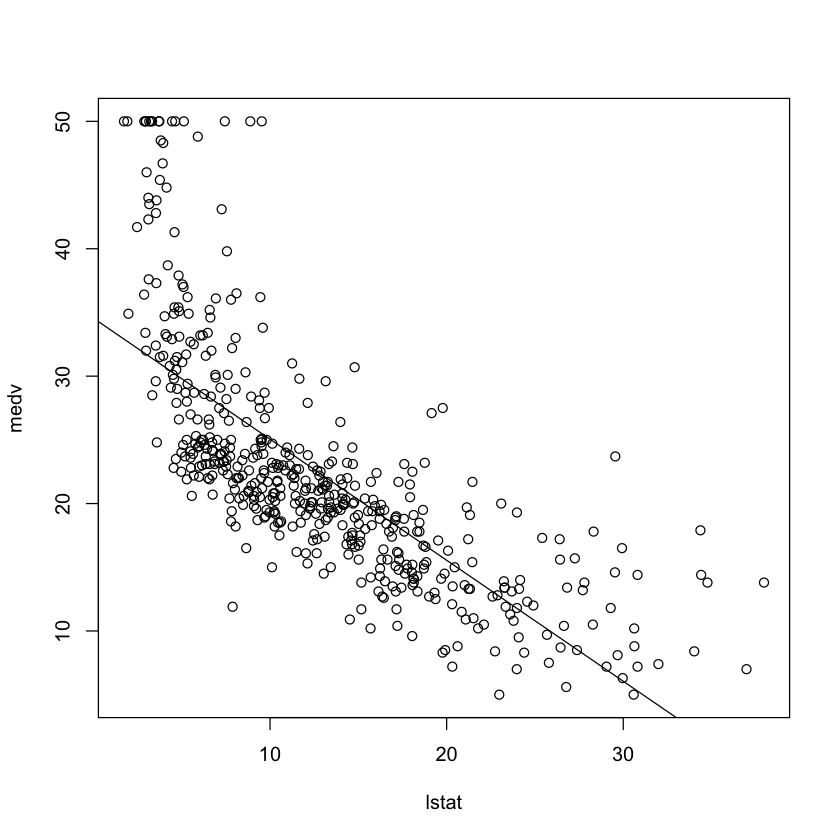

In [19]:
plot(lstat, medv)
abline(lm.fit)

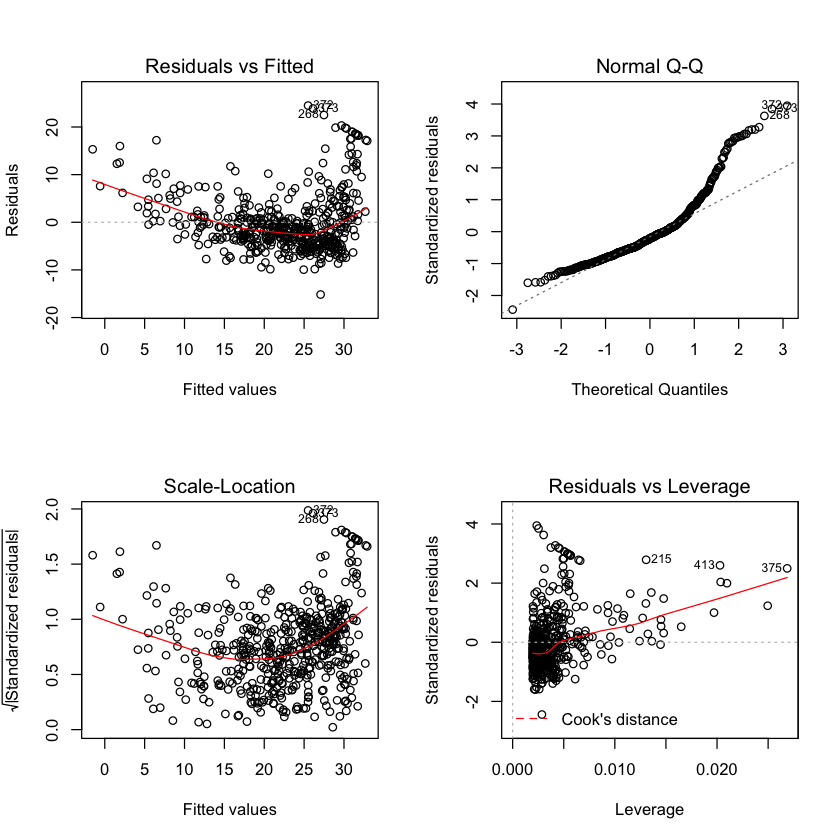

In [24]:
par(mfrow=c(2,2))
plot(lm.fit)


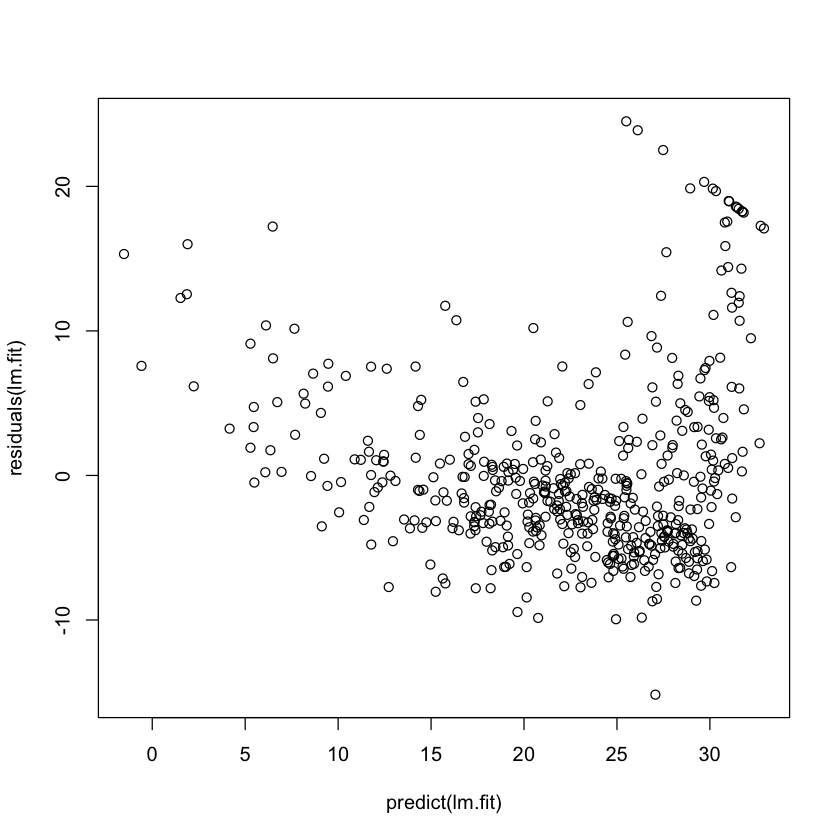

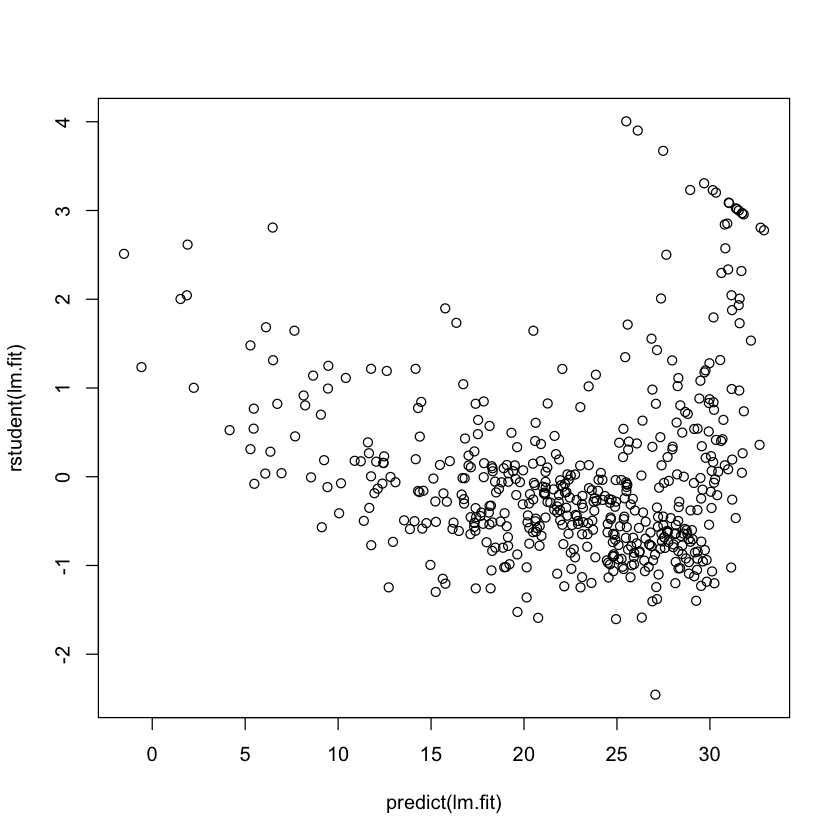

In [26]:
plot(predict(lm.fit), residuals(lm.fit))
plot(predict(lm.fit), rstudent(lm.fit))


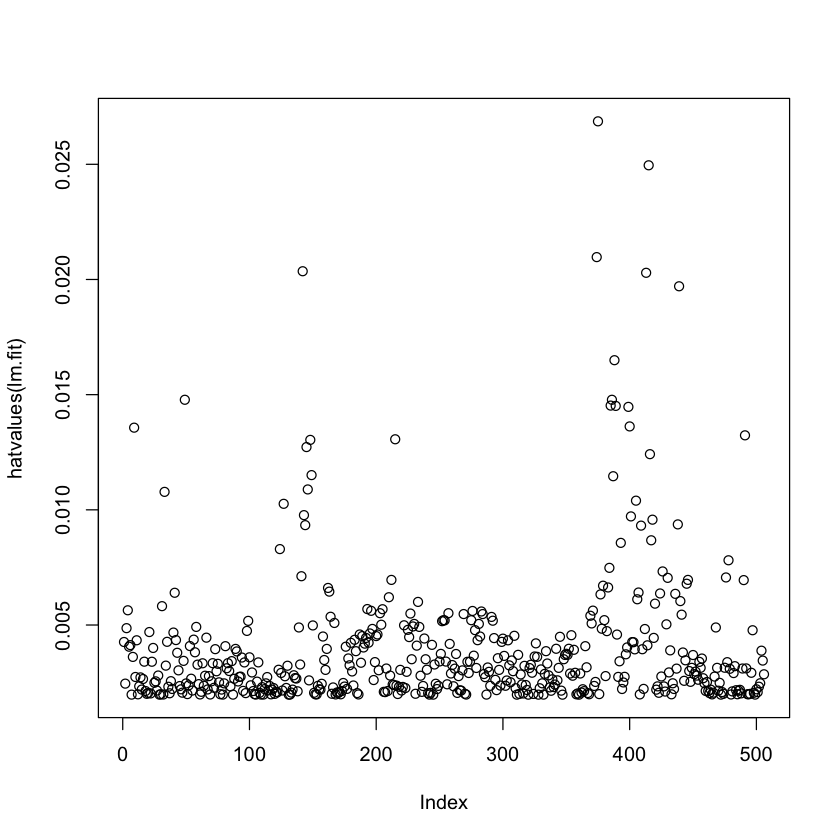

In [27]:
plot(hatvalues (lm.fit))

In [28]:
which.max(hatvalues (lm.fit))

375 
375

The which.max() function identifies the index of the largest element of a vector. In this case, it tells us which observation has the largest leverage statistic.

### Multiple Linear Regression

In [29]:
lm.fit = lm(medv ~ lstat + age, data=Boston)

In [30]:
summary(lm.fit)


Call:
lm(formula = medv ~ lstat + age, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.981  -3.978  -1.283   1.968  23.158 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 33.22276    0.73085  45.458  < 2e-16 ***
lstat       -1.03207    0.04819 -21.416  < 2e-16 ***
age          0.03454    0.01223   2.826  0.00491 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.173 on 503 degrees of freedom
Multiple R-squared:  0.5513,	Adjusted R-squared:  0.5495 
F-statistic:   309 on 2 and 503 DF,  p-value: < 2.2e-16


The Boston data set contains 13 variables, and so it would be cumbersome to have to type all of these in order to perform a regression using all of the predictors. Instead, we can use the following short-hand:

In [31]:
lm.fit = lm(medv~., data=Boston)

In [32]:
summary(lm.fit)


Call:
lm(formula = medv ~ ., data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.595  -2.730  -0.518   1.777  26.199 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.646e+01  5.103e+00   7.144 3.28e-12 ***
crim        -1.080e-01  3.286e-02  -3.287 0.001087 ** 
zn           4.642e-02  1.373e-02   3.382 0.000778 ***
indus        2.056e-02  6.150e-02   0.334 0.738288    
chas         2.687e+00  8.616e-01   3.118 0.001925 ** 
nox         -1.777e+01  3.820e+00  -4.651 4.25e-06 ***
rm           3.810e+00  4.179e-01   9.116  < 2e-16 ***
age          6.922e-04  1.321e-02   0.052 0.958229    
dis         -1.476e+00  1.995e-01  -7.398 6.01e-13 ***
rad          3.060e-01  6.635e-02   4.613 5.07e-06 ***
tax         -1.233e-02  3.760e-03  -3.280 0.001112 ** 
ptratio     -9.527e-01  1.308e-01  -7.283 1.31e-12 ***
black        9.312e-03  2.686e-03   3.467 0.000573 ***
lstat       -5.248e-01  5.072e-02 -10.347  < 2e-16 ***
---
Signif. codes:  0

In [33]:
?summary.lm

In [34]:
summary(lm.fit)$r.squared

[1] 0.7406427

What if we would like to perform a regression using all of the variables but one? For example, in the above regression output, age has a high p-value. So we may wish to run a regression excluding this predictor. The following syntax results in a regression using all predictors except age.

In [35]:
lm.fit1 = lm(medv ~ . - age, data=Boston)

In [36]:
summary(lm.fit1)


Call:
lm(formula = medv ~ . - age, data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.6054  -2.7313  -0.5188   1.7601  26.2243 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  36.436927   5.080119   7.172 2.72e-12 ***
crim         -0.108006   0.032832  -3.290 0.001075 ** 
zn            0.046334   0.013613   3.404 0.000719 ***
indus         0.020562   0.061433   0.335 0.737989    
chas          2.689026   0.859598   3.128 0.001863 ** 
nox         -17.713540   3.679308  -4.814 1.97e-06 ***
rm            3.814394   0.408480   9.338  < 2e-16 ***
dis          -1.478612   0.190611  -7.757 5.03e-14 ***
rad           0.305786   0.066089   4.627 4.75e-06 ***
tax          -0.012329   0.003755  -3.283 0.001099 ** 
ptratio      -0.952211   0.130294  -7.308 1.10e-12 ***
black         0.009321   0.002678   3.481 0.000544 ***
lstat        -0.523852   0.047625 -10.999  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1

Alternatively, the update() function can be used.

In [37]:
lm.fit2 = update(lm.fit, ~.-age)

In [38]:
summary(lm.fit2)


Call:
lm(formula = medv ~ crim + zn + indus + chas + nox + rm + dis + 
    rad + tax + ptratio + black + lstat, data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.6054  -2.7313  -0.5188   1.7601  26.2243 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  36.436927   5.080119   7.172 2.72e-12 ***
crim         -0.108006   0.032832  -3.290 0.001075 ** 
zn            0.046334   0.013613   3.404 0.000719 ***
indus         0.020562   0.061433   0.335 0.737989    
chas          2.689026   0.859598   3.128 0.001863 ** 
nox         -17.713540   3.679308  -4.814 1.97e-06 ***
rm            3.814394   0.408480   9.338  < 2e-16 ***
dis          -1.478612   0.190611  -7.757 5.03e-14 ***
rad           0.305786   0.066089   4.627 4.75e-06 ***
tax          -0.012329   0.003755  -3.283 0.001099 ** 
ptratio      -0.952211   0.130294  -7.308 1.10e-12 ***
black         0.009321   0.002678   3.481 0.000544 ***
lstat        -0.523852   0.047625 -10.

### Interactive items

The syntax `lstat:black` tells R to include an interaction term between lstat and black. The syntax `lstat*age` simultaneously includes `lstat`, `age`, and the interaction term `lstat×age` as predictors; it is a shorthand for `lstat+age+lstat:age`.

In [39]:
summary(lm(medv~lstat*age, data=Boston))


Call:
lm(formula = medv ~ lstat * age, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.806  -4.045  -1.333   2.085  27.552 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 36.0885359  1.4698355  24.553  < 2e-16 ***
lstat       -1.3921168  0.1674555  -8.313 8.78e-16 ***
age         -0.0007209  0.0198792  -0.036   0.9711    
lstat:age    0.0041560  0.0018518   2.244   0.0252 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.149 on 502 degrees of freedom
Multiple R-squared:  0.5557,	Adjusted R-squared:  0.5531 
F-statistic: 209.3 on 3 and 502 DF,  p-value: < 2.2e-16


### Non-linear transformation of predictors

The lm() function can also accommodate non-linear transformations of the predictors. For instance, given a predictor X, we can create a predictor X2 using I(X^2). The function I() is needed since the ^ has a special meaning I() in a formula; wrapping as we do allows the standard usage in R, which is
to raise X to the power 2. We now perform a regression of medv onto lstat and lstat2.

In [40]:
lm.fit2 = lm(medv ~ lstat + I(lstat^2))

In [41]:
summary(lm.fit2)


Call:
lm(formula = medv ~ lstat + I(lstat^2))

Residuals:
     Min       1Q   Median       3Q      Max 
-15.2834  -3.8313  -0.5295   2.3095  25.4148 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 42.862007   0.872084   49.15   <2e-16 ***
lstat       -2.332821   0.123803  -18.84   <2e-16 ***
I(lstat^2)   0.043547   0.003745   11.63   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.524 on 503 degrees of freedom
Multiple R-squared:  0.6407,	Adjusted R-squared:  0.6393 
F-statistic: 448.5 on 2 and 503 DF,  p-value: < 2.2e-16


The near-zero p-value associated with the quadratic term suggests that it leads to an improved model. We use the anova() function to further quantify the extent to which the quadratic fit is superior to the linear fit.

In [44]:
lm.fit = lm(medv ~ lstat, data=Boston)

In [45]:
anova(lm.fit, lm.fit2)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
504,19472.38,NA,NA,NA,NA
503,15347.24,1,4125.138,135.1998,7.630116e-28


Here Model 1 represents the linear submodel containing only one predictor,
lstat, while Model 2 corresponds to the larger quadratic model that has two predictors, lstat and lstat2. The anova() function performs a hypothesis test comparing the two models. The null hypothesis is that the two models fit the data equally well, and the alternative hypothesis is that the full model is superior. Here the F-statistic is 135 and the associated p-value is virtually zero. This provides very clear evidence that the model containing the predictors lstat and lstat2 is far superior to the model that only contains the predictor lstat. This is not surprising, since earlier we saw evidence for non-linearity in the relationship between medv and lstat.

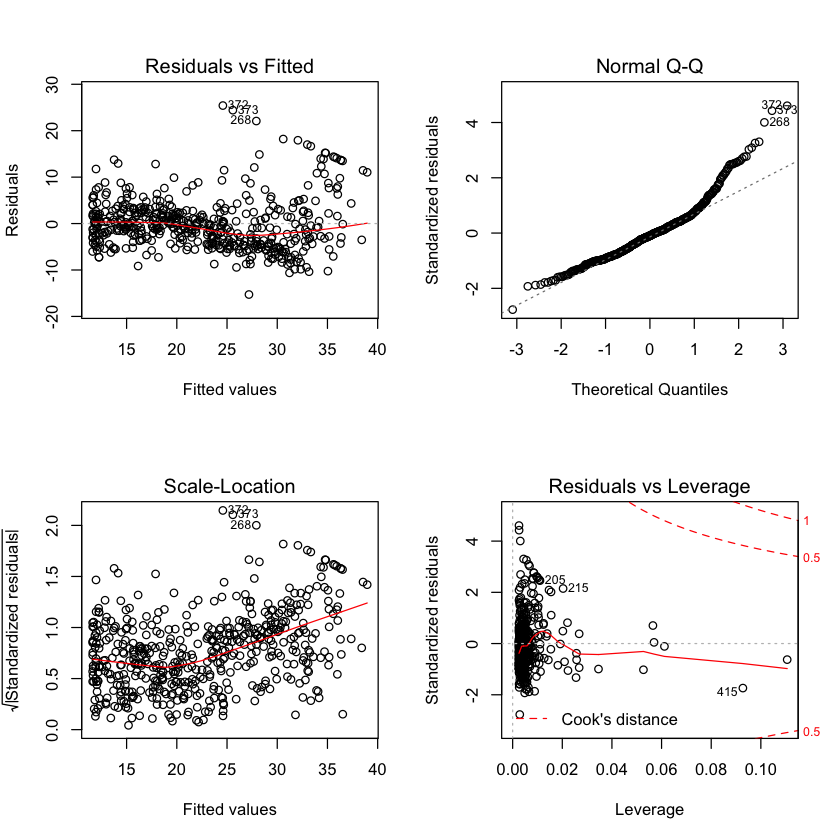

In [46]:
par(mfrow=c(2,2))
plot(lm.fit2)

In order to create a cubic fit, we can include a predictor of the form I(X^3). However, this approach can start to get cumbersome for higher- order polynomials. A better approach involves using the poly() function to create the polynomial within lm(). 

In [49]:
lm.fit5 = lm(medv ~ poly(lstat, 5))

In [50]:
summary(lm.fit5)


Call:
lm(formula = medv ~ poly(lstat, 5))

Residuals:
     Min       1Q   Median       3Q      Max 
-13.5433  -3.1039  -0.7052   2.0844  27.1153 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       22.5328     0.2318  97.197  < 2e-16 ***
poly(lstat, 5)1 -152.4595     5.2148 -29.236  < 2e-16 ***
poly(lstat, 5)2   64.2272     5.2148  12.316  < 2e-16 ***
poly(lstat, 5)3  -27.0511     5.2148  -5.187 3.10e-07 ***
poly(lstat, 5)4   25.4517     5.2148   4.881 1.42e-06 ***
poly(lstat, 5)5  -19.2524     5.2148  -3.692 0.000247 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.215 on 500 degrees of freedom
Multiple R-squared:  0.6817,	Adjusted R-squared:  0.6785 
F-statistic: 214.2 on 5 and 500 DF,  p-value: < 2.2e-16


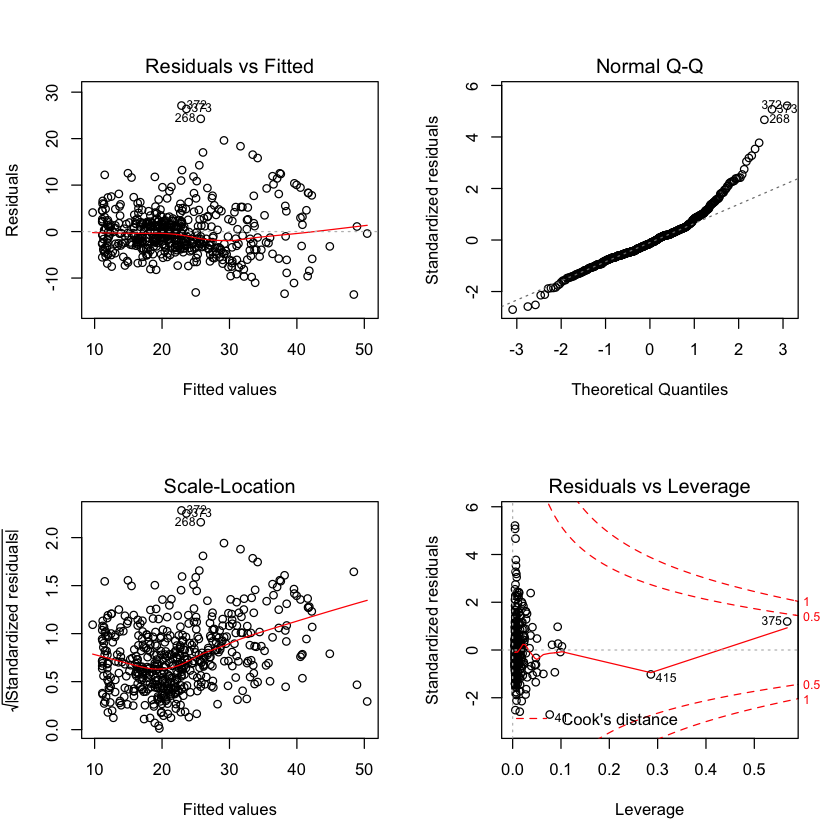

In [51]:
par(mfrow=c(2,2))
plot(lm.fit5)

This suggests that including additional polynomial terms, up to fifth order, leads to an improvement in the model fit! However, further investigation of the data reveals that no polynomial terms beyond fifth order have signifi- cant p-values in a regression fit.

In [52]:
summary(lm(medv~log(rm), data=Boston))


Call:
lm(formula = medv ~ log(rm), data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-19.487  -2.875  -0.104   2.837  39.816 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -76.488      5.028  -15.21   <2e-16 ***
log(rm)       54.055      2.739   19.73   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.915 on 504 degrees of freedom
Multiple R-squared:  0.4358,	Adjusted R-squared:  0.4347 
F-statistic: 389.3 on 1 and 504 DF,  p-value: < 2.2e-16


### 3.6.6 Qualitative Predictors

We will now examine the Carseats data, which is part of the ISLR library. We will attempt to predict Sales (child car seat sales) in 400 locations based on a number of predictors.

In [54]:
names(Carseats)

[1] "Sales"       "CompPrice"   "Income"      "Advertising" "Population" 
 [6] "Price"       "ShelveLoc"   "Age"         "Education"   "Urban"      
[11] "US"

In [55]:
head(Carseats)

Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
11.22,111,48,16,260,83,Good,65,10,Yes,Yes
10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4.15,141,64,3,340,128,Bad,38,13,Yes,No
10.81,124,113,13,501,72,Bad,78,16,No,Yes


In [57]:
lm.fit=lm(Sales~.+Income:Advertising+Price:Age,data=Carseats)

In [58]:
summary(lm.fit)


Call:
lm(formula = Sales ~ . + Income:Advertising + Price:Age, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9208 -0.7503  0.0177  0.6754  3.3413 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         6.5755654  1.0087470   6.519 2.22e-10 ***
CompPrice           0.0929371  0.0041183  22.567  < 2e-16 ***
Income              0.0108940  0.0026044   4.183 3.57e-05 ***
Advertising         0.0702462  0.0226091   3.107 0.002030 ** 
Population          0.0001592  0.0003679   0.433 0.665330    
Price              -0.1008064  0.0074399 -13.549  < 2e-16 ***
ShelveLocGood       4.8486762  0.1528378  31.724  < 2e-16 ***
ShelveLocMedium     1.9532620  0.1257682  15.531  < 2e-16 ***
Age                -0.0579466  0.0159506  -3.633 0.000318 ***
Education          -0.0208525  0.0196131  -1.063 0.288361    
UrbanYes            0.1401597  0.1124019   1.247 0.213171    
USYes              -0.1575571  0.1489234  -1.058 0.290729    
Inco

In [59]:
attach(Carseats)

In [62]:
contrasts(ShelveLoc)

,Good,Medium
Bad,0,0
Good,1,0
Medium,0,1
